<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3 Web APIs & Classification
_Authors: Li Jiansheng

---


## Problem Statement
As a data scientist in Android Inc, we are looking at how to better design and develop android phones. There are many variants of Android and we want to look at reddit forums to see what users prefer in a mobile phone. At the same time, Android has a close competitor, Iphone. <br><br>We would also want to look at their users comments on Iphone as well. However as there are still differences in the phones' users and usage, we would want to classify the two types of reddit posts to enhance our research.

## Executive Summary

### Contents:
- [Android Posts Data Import](reddit-android-data-collection.ipynb)
- [Iphone Posts Data Import](reddit-iphone-data-collection.ipynb)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Modeling](#Modeling)
- [Model Evaluation](#Model-Evaluation)
- [Conclusion and Recommendations](#Conclusion-and-Recommendations)

## Web Scraping
We start our project by scraping data from our topics of interest, Android and Iphone. Web scraping from 2 reddit topics were done in another file. 
- [Android Posts Data Import](reddit-android-data-collection.ipynb)
- [Iphone Posts Data Import](reddit-iphone-data-collection.ipynb)


## Exploratory Data Analysis

In [1]:
#All libraries used in this project are listed here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

import re
from bs4 import BeautifulSoup 

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score, make_scorer, recall_score, precision_score,accuracy_score



#### Read scrapped data into Dataframes
We saved our scrapped in 2 different csv files. We want to read the data into dataframes for exploratory data analysis and cleaning.

In [2]:
android_df = pd.read_csv('./datasets/android.csv')

android_df.drop_duplicates(subset='title', keep='first', inplace=True)
len(android_df)


786

In [3]:
iphone_df = pd.read_csv('./datasets/iphone.csv')
iphone_df.drop_duplicates(subset='title', keep='first', inplace=True)
len(iphone_df)

715

In [4]:
android_df.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,created_utc,num_crossposts,media,is_video,post_hint,preview,crosspost_parent_list,crosspost_parent,link_flair_template_id,author_cakeday
0,NaN,Android,"Note 1. Join us at /r/MoronicMondayAndroid, a ...",t2_6l4z3,False,NaN,0,False,Moronic Monday (Jan 20 2020) - Your weekly que...,[],...,1.579519e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Android,Device reviews are everywhere these days. From...,t2_p7o61,False,NaN,0,False,/r/android reviews: LG line,[],...,1.579374e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Android,NaN,t2_kfy6p,False,NaN,0,False,Samsung Galaxy S20 release in France (and worl...,[],...,1.579615e+09,0,NaN,False,link,{'images': [{'source': {'url': 'https://extern...,NaN,NaN,NaN,NaN
3,NaN,Android,NaN,t2_2ja6dymo,False,NaN,0,False,Good Lock 2020 with Android 10 support will be...,[],...,1.579623e+09,0,NaN,False,link,{'images': [{'source': {'url': 'https://extern...,NaN,NaN,NaN,NaN
4,NaN,Android,NaN,t2_tamwpg9,False,NaN,0,False,Wine 5.0 Released - run some Windows programs ...,[],...,1.579636e+09,0,NaN,False,link,{'images': [{'source': {'url': 'https://extern...,NaN,NaN,NaN,NaN


In [5]:
iphone_df.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,num_crossposts,media,is_video,post_hint,preview,crosspost_parent_list,crosspost_parent,link_flair_template_id,media_metadata,author_cakeday
0,NaN,iphone,NaN,t2_s0id44,False,NaN,0,False,Why isn’t iCloud storage offered in size incre...,[],...,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,iphone,Does automatic brightness adjustment use more ...,t2_21lzgjf2,False,NaN,0,False,Brightness adjustment.,[],...,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,iphone,I was wondering if Apple ever discloses what i...,t2_2ok9v9e,False,NaN,0,False,Most popular iPhone colors,[],...,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,iphone,NaN,t2_17u3sw1m,False,NaN,0,False,My brand-new iPhone just got a crack on the fr...,[],...,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,iphone,"\nHey guys,\nI made the jump to the 11 Pro Max...",t2_1fzkarcp,False,NaN,0,False,I bought a 11 Pro Max after reading what you g...,[],...,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We are going to analyse text from columns selftext and title as our main text source. **Subreddit** will be our classification target. We will combine the 2 dataframes first.

#### Combine Android and Iphone dataframes
Check for null after combining. We will fill any null with none data as there is no where to enter correct data.

In [6]:
mobile_df = pd.concat([android_df,iphone_df])

#check for na in 'title' and 'selftext'
mobile_df['title'].isnull().sum()

/opt/anaconda3/envs/DSI/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


0

In [7]:
mobile_df['selftext'].isnull().sum()

749

In [8]:
mobile_df['selftext'].fillna('', inplace=True)

mobile_df['content']=mobile_df['title'] +' '+ mobile_df['selftext']

#### Map Subreddit
Android will be our positive value posts.

In [9]:
mobile_df['subreddit'] = mobile_df['subreddit'].map({'Android':1,'iphone':0})
mobile_df.head()

,all_awardings,allow_live_comments,approved_at_utc,approved_by,archived,author,author_cakeday,author_flair_background_color,author_flair_css_class,author_flair_richtext,...,title,total_awards_received,ups,url,user_reports,view_count,visited,whitelist_status,wls,content
0,[],False,NaN,NaN,False,AutoModerator,NaN,NaN,robot,[],...,Moronic Monday (Jan 20 2020) - Your weekly que...,0,15,https://www.reddit.com/r/Android/comments/erby...,[],NaN,False,all_ads,6,Moronic Monday (Jan 20 2020) - Your weekly que...
1,[],False,NaN,NaN,False,curated_android,NaN,NaN,NaN,[],...,/r/android reviews: LG line,0,86,https://www.reddit.com/r/Android/comments/eqki...,[],NaN,False,all_ads,6,/r/android reviews: LG line Device reviews are...
2,[],False,NaN,NaN,False,CliveLH,NaN,NaN,NaN,[],...,Samsung Galaxy S20 release in France (and worl...,0,1219,https://www.frandroid.com/marques/samsung/6615...,[],NaN,False,all_ads,6,Samsung Galaxy S20 release in France (and worl...
3,[],True,NaN,NaN,False,ihjao,NaN,NaN,NaN,[],...,Good Lock 2020 with Android 10 support will be...,0,680,https://www.sammobile.com/news/good-lock-2020-...,[],NaN,False,all_ads,6,Good Lock 2020 with Android 10 support will be...
4,[],False,NaN,NaN,False,merrycachemiss,NaN,NaN,NaN,[],...,Wine 5.0 Released - run some Windows programs ...,0,340,https://www.winehq.org/news/2020012101,[],NaN,False,all_ads,6,Wine 5.0 Released - run some Windows programs ...


In [10]:
mobile_df['subreddit']

0      1
1      1
2      1
3      1
4      1
      ..
710    0
711    0
712    0
713    0
714    0
Name: subreddit, Length: 1501, dtype: int64

#### Baseline Score

In [11]:
mobile_df['subreddit'].value_counts(normalize=True)

1    0.523651
0    0.476349
Name: subreddit, dtype: float64

#### Final Dataframe
After combining and removing unwanted columns, we have our final dataframe.

In [12]:
mobile_df=mobile_df.loc[:,('subreddit','content')]
mobile_df.head()

,subreddit,content
0,1,Moronic Monday (Jan 20 2020) - Your weekly que...
1,1,/r/android reviews: LG line Device reviews are...
2,1,Samsung Galaxy S20 release in France (and worl...
3,1,Good Lock 2020 with Android 10 support will be...
4,1,Wine 5.0 Released - run some Windows programs ...


Apply lowercase to all content.

In [13]:
mobile_df['content']=[c.lower() for c in mobile_df['content']]

In [14]:
mobile_df.head()

,subreddit,content
0,1,moronic monday (jan 20 2020) - your weekly que...
1,1,/r/android reviews: lg line device reviews are...
2,1,samsung galaxy s20 release in france (and worl...
3,1,good lock 2020 with android 10 support will be...
4,1,wine 5.0 released - run some windows programs ...


#### Train Test Split the dataframe

In [15]:
X_train, X_test, y_train, y_test = train_test_split(mobile_df[['content']],
                                                    mobile_df['subreddit'],
                                                    test_size = 0.25,
                                                    stratify=mobile_df['subreddit'],
                                                    random_state = 42)

In [16]:
X_train.shape

(1125, 1)

In [17]:
def review_to_words(raw_content):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    
    # 1. Remove HTML.
    content_text = BeautifulSoup(raw_content).get_text()
    
    # 2. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", content_text)
    
    # 3. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # 4. In Python, searching a set is much faster than searching
    # a list, so convert the stop words to a set.
    stops = stopwords.words('english')
    stops.extend(['none','iphone','android','mobile','device','app','ios','\n', 'www', 'reddit', 'com', 'comment', 'http','https'])
    stops = set(stops)
  
    # 5. Remove stop words.
    meaningful_words = [w for w in words if not w in stops]
    # 6. Lemmatize our words
    lemmatizer = WordNetLemmatizer()
    tokens_lem = [lemmatizer.lemmatize(i) for i in meaningful_words]
    
    # 7. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(tokens_lem))

In [18]:
# Get the number of posts based on the dataframe size.
total_content = mobile_df.shape[0]
print(f'There are {total_content} content.')

# Initialize an empty list to hold the clean posts.
clean_train_content = []
clean_test_content = []

There are 1501 content.


In [19]:
print("Cleaning and parsing the training set content...")

j = 0
for train_content in X_train['content']:
    # Convert posts to words, then append to clean_train_content.
    clean_train_content.append(review_to_words(train_content))
    
print("Cleaning and parsing the testing set content...")

for test_content in X_test['content']:
    # Convert posts to words, then append to clean_train_content.
    clean_test_content.append(review_to_words(test_content))
    

Cleaning and parsing the training set content...
Cleaning and parsing the testing set content...


## Modeling
The 2 models we will be using will be Logistic Regression and Naive Bayes Mutlinomial. As our content will be converted to integers using CountVectorizer, Multinomial will be chosen. The way we implement our models will be through pipeline. This method is easier to implement and allows a easier way to implement GridSearch as well.

#### i) Logistic Regression Model with CountVectorizer

In [20]:
pipe = Pipeline([('cvec', CountVectorizer()),
                 ('lr', LogisticRegression(solver='lbfgs'))
                ])

In [21]:
cross_val_score(pipe, clean_train_content, y_train, cv=5)

array([0.85840708, 0.89333333, 0.83111111, 0.85333333, 0.875     ])

In [22]:
# ii. Fit into model
pipe.fit(clean_train_content, y_train)

# Training score
print(pipe.score(clean_train_content, y_train))

# Test score
print(pipe.score(clean_test_content, y_test))

0.9946666666666667
0.8351063829787234


In [23]:
pipe_params = {
    'cvec__max_features': [2500, 3000, 3500],
    'cvec__min_df': [1, 2],
    'cvec__max_df': [.8,.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)]
}
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}
#scorers dictionary allows us to prioritize which score we want for the model. Then we refit back the parameters to our model
gs = GridSearchCV(pipe,param_grid=pipe_params,scoring=scorers,refit='accuracy_score', cv=5)

In [24]:
%time 
gs.fit(clean_train_content, y_train)
print(gs.best_score_)
gs.best_params_

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.11 µs
0.8684444444444445


{'cvec__max_df': 0.8,
 'cvec__max_features': 3500,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 2)}

In [25]:
gs.score(clean_train_content, y_train)

0.9911111111111112

In [26]:
gs.score(clean_test_content, y_test)

0.8430851063829787

#### ii) Logistic Regression Model with TFIDVectorizer

In [27]:
pipe2 = Pipeline([('tfid', TfidfVectorizer()),
                 ('lr', LogisticRegression(solver='lbfgs'))
                ])

In [28]:
cross_val_score(pipe2, clean_train_content, y_train, cv=5)

array([0.86283186, 0.91555556, 0.83111111, 0.87111111, 0.875     ])

In [29]:
# ii. Fit into model
pipe2.fit(clean_train_content, y_train)

# Training score
print(pipe2.score(clean_train_content, y_train))

# Test score
print(pipe2.score(clean_test_content, y_test))

0.9697777777777777
0.8377659574468085


In [30]:
pipe2_params = {
    'tfid__max_features': [2500, 3000, 3500],
    'tfid__min_df': [1, 2],
    'tfid__max_df': [.8,.9, .95],
    'tfid__ngram_range': [(1,1), (1,2)]
}


gs_lr1 = GridSearchCV(pipe2,param_grid=pipe2_params,scoring=scorers,refit='accuracy_score', cv=5)

In [31]:
%time 
gs_lr1.fit(clean_train_content, y_train)
print(gs_lr1.best_score_)
gs_lr1.best_params_

CPU times: user 8 µs, sys: 1e+03 ns, total: 9 µs
Wall time: 5.01 µs
0.8826666666666667


{'tfid__max_df': 0.8,
 'tfid__max_features': 2500,
 'tfid__min_df': 2,
 'tfid__ngram_range': (1, 2)}

In [32]:
gs_lr1.score(clean_train_content, y_train)

0.9608888888888889

In [33]:
gs_lr1.score(clean_test_content, y_test)

0.8271276595744681

#### iii) View Logistic Regression stats using confusion matrix

##### Confusion matrix with CountVectorizer

In [34]:
lr_predictions=gs.predict(clean_test_content)

In [35]:
lr_cm=confusion_matrix(y_test, lr_predictions)

In [36]:
lr_cm_df = pd.DataFrame(lr_cm, columns=['pred Iphone', 'pred Android'], index=['actual Iphone', 'actual Android'])
lr_cm_df

,pred Iphone,pred Android
actual Iphone,141,38
actual Android,21,176


In [37]:
tn, fp, fn, tp = confusion_matrix(y_test, lr_predictions).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 141
False Positives: 38
False Negatives: 21
True Positives: 176


##### Confusion matrix with TFIDVectorizer

In [38]:
lr1_predictions=gs_lr1.predict(clean_test_content)

In [39]:
lr1_cm=confusion_matrix(y_test, lr1_predictions)

In [40]:
lr1_cm_df = pd.DataFrame(lr1_cm, columns=['pred Iphone', 'pred Android'], index=['actual Iphone', 'actual Android'])
lr1_cm_df

,pred Iphone,pred Android
actual Iphone,134,45
actual Android,20,177


In [41]:
tn, fp, fn, tp = confusion_matrix(y_test, lr1_predictions).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 134
False Positives: 45
False Negatives: 20
True Positives: 177


#### iv) Naive Bayes Multinomial with CountVectorizer

In [42]:
pipe3 = Pipeline([('cvec', CountVectorizer()),
                 ('nb', MultinomialNB())
                ])

In [43]:
cross_val_score(pipe3, clean_train_content, y_train, cv=5)

array([0.71238938, 0.84888889, 0.73333333, 0.75555556, 0.75      ])

In [44]:
# ii. Fit into model
pipe3.fit(clean_train_content, y_train)

# Training score
print(pipe3.score(clean_train_content, y_train))

# Test score
print(pipe3.score(clean_test_content, y_test))

0.9066666666666666
0.7446808510638298


In [45]:
pipe_params3 = {
    'cvec__max_features': [2500, 3000, 3500],
    'cvec__min_df': [1, 2],
    'cvec__max_df': [.8,.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)]
}


In [46]:
gs_nb1 = GridSearchCV(pipe3, param_grid=pipe_params3,scoring=scorers,refit='accuracy_score', cv=5)

In [47]:
%time 
gs_nb1.fit(clean_train_content, y_train)
print(gs_nb1.best_score_)
gs_nb1.best_params_

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
0.7555555555555555


{'cvec__max_df': 0.8,
 'cvec__max_features': 3000,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1)}

In [48]:
gs_nb1.score(clean_train_content,y_train)

0.8577777777777778

In [49]:
gs_nb1.score(clean_test_content,y_test)

0.7393617021276596

#### v) Naive Bayes Multinomial with TFIDVectorizer

In [50]:
pipe4 = Pipeline([('tfid', TfidfVectorizer()),
                 ('nb', MultinomialNB())
                ])

In [51]:
cross_val_score(pipe4, clean_train_content, y_train, cv=5)

array([0.86283186, 0.88888889, 0.82666667, 0.87555556, 0.88839286])

In [52]:
# ii. Fit into model
pipe4.fit(clean_train_content, y_train)

# Training score
print(pipe4.score(clean_train_content, y_train))

# Test score
print(pipe4.score(clean_test_content, y_test))

0.9742222222222222
0.8351063829787234


In [53]:
pipe_params4 = {
    'tfid__max_features': [2500, 3000, 3500],
    'tfid__min_df': [1, 2],
    'tfid__max_df': [.8,.9, .95],
    'tfid__ngram_range': [(1,1), (1,2)]
}


In [54]:
gs_nb2 = GridSearchCV(pipe4, param_grid=pipe_params4,scoring=scorers,refit='accuracy_score', cv=5)

In [55]:
%time 
gs_nb2.fit(clean_train_content, y_train)
print(gs_nb2.best_score_)
gs_nb2.best_params_

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.2 µs
0.8728888888888889


{'tfid__max_df': 0.8,
 'tfid__max_features': 2500,
 'tfid__min_df': 1,
 'tfid__ngram_range': (1, 1)}

In [56]:
gs_nb2.score(clean_train_content,y_train)

0.9573333333333334

In [57]:
gs_nb2.score(clean_test_content,y_test)

0.8271276595744681

#### vi) View Naive Bayes Multinomial using confusion matrix

##### Confusion matrix with CountVectorizer

In [58]:
nb1_predictions=gs_nb1.predict(clean_test_content)

In [59]:
nb1_cm=confusion_matrix(y_test, nb1_predictions)

In [60]:
nb1_cm_df = pd.DataFrame(nb1_cm, columns=['pred Iphone', 'pred Android'], index=['actual Iphone', 'actual Android'])
nb1_cm_df

,pred Iphone,pred Android
actual Iphone,87,92
actual Android,6,191


In [61]:
tn, fp, fn, tp = confusion_matrix(y_test, nb1_predictions).ravel()

In [62]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 87
False Positives: 92
False Negatives: 6
True Positives: 191


##### Confusion matrix with TFIDVectorizer

In [63]:
nb2_predictions=gs_nb2.predict(clean_test_content)

In [64]:
nb2_cm=confusion_matrix(y_test, nb2_predictions)

In [65]:
nb2_cm_df = pd.DataFrame(nb2_cm, columns=['pred Iphone', 'pred Android'], index=['actual Iphone', 'actual Android'])
nb2_cm_df

,pred Iphone,pred Android
actual Iphone,132,47
actual Android,18,179


In [66]:
tn, fp, fn, tp = confusion_matrix(y_test, nb2_predictions).ravel()

In [67]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 132
False Positives: 47
False Negatives: 18
True Positives: 179


## Model Evaluation
By using different Count and TFID vectorizer, we can see that the model gives different results. We will evaluate our 2 models with TFIDVectorizer. Using their accuracy and precision score. We will view the model's performance using ROC curve as well.

In [68]:
def compareStats(m1,m2,xtrain,ytrain,xtest,ytest):
    m1.fit(xtrain, ytrain)
    score1=round(m1.score(xtest, ytest),2)
    predictions1=m1.predict(xtest)
    m1_cm=confusion_matrix(ytest, predictions1)
    tn1, fp1, fn1, tp1 = confusion_matrix(ytest, predictions1).ravel()
    recall1=round((tp1/(tp1+fn1)),2)
    precision1=round((tp1/(tp1+fp1)),2)
    
    m2.fit(xtrain, ytrain)
    score2=round(m2.score(xtest, ytest),2)
    predictions2=m2.predict(xtest)
    m2_cm=confusion_matrix(ytest, predictions2)
    tn2, fp2, fn2, tp2 = confusion_matrix(ytest, predictions2).ravel()
    recall2=round((tp2/(tp2+fn2)),2)
    precision2=round((tp2/(tp2+fp2)),2)
    
    print("Stats     | Logistic Regression | Multinomial |")
    print("================================================")
    print("Recall    |          ",recall1,"     |  ",recall2,"      |" )
    print("Precision |          ",precision1,"      |  ",precision2,"     |" )
    print("Score     |          ",score1,"     |  ",score2,"     |" )
    print("TP        |          ",tp1,"      |  ",tp2,"      |" )
    print("TN        |          ",tn1,"      |  ",tn2,"      |" )
    print("FP        |          ",fp1,"       |  ",fp2,"       |" )
    print("FN        |          ",fn1,"       |  ",fn2,"       |" )
    
    
compareStats(pipe2,pipe4,clean_train_content,y_train,clean_test_content,y_test)
    

Stats     | Logistic Regression | Multinomial |
Recall    |           0.92      |   0.9       |
Precision |           0.8       |   0.81      |
Score     |           0.84      |   0.84      |
TP        |           181       |   178       |
TN        |           134       |   136       |
FP        |           45        |   43        |
FN        |           16        |   19        |


#### Observations from comparing Model stats
We can see from the stats that both models performed similarly. In our case, precision score is important as we want to accurately identify Android posts. we want to know what Android users comment about their android phones and implement the right features. If If we wrongly implement a feature that was commented by an Iphone user on their Iphone, it may cause design and sales issues. However in this case, our both models have only slight differences in our most scores. 

In [69]:
# Let's create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

pred_proba = [i[1] for i in pipe.predict_proba(clean_test_content)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})
pred_df

,true_values,pred_probs
643,0,0.999758
783,1,0.999998
666,1,0.979126
35,0,0.004853
99,0,0.739274
...,...,...
626,0,0.691232
766,1,0.849026
106,1,0.919788
609,0,0.004712


In [70]:
# Let's create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

pred_proba2 = [i[1] for i in pipe2.predict_proba(clean_test_content)]

pred_df2 = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba2})
pred_df2

,true_values,pred_probs
643,0,0.705631
783,1,0.786060
666,1,0.636050
35,0,0.100509
99,0,0.579032
...,...,...
626,0,0.634926
766,1,0.543056
106,1,0.773380
609,0,0.314982


In [71]:
roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])

0.9250205597935512

In [72]:
roc_auc_score(pred_df2['true_values'], pred_df2['pred_probs'])

0.9349743357059808

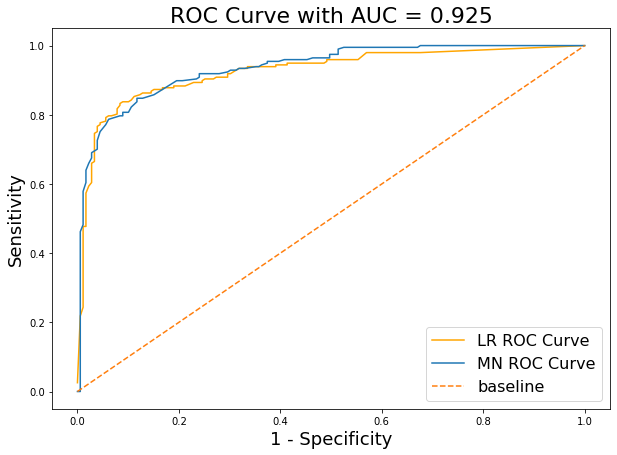

In [73]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

tpr_values2 = [TPR(pred_df2, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values2 = [FPR(pred_df2, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='LR ROC Curve',
        color='orange')

plt.plot(fpr_values2, # False Positive Rate on X-axis
         tpr_values2, # True Positive Rate on Y-axis
         label='MN ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f'ROC Curve with AUC = {round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

#### Intepreting ROC curve
The more area under a curve means better better separated our distributions our model give. When our ROC AUC is closer to 1, then our positive and negative populations are better separated which means the model is better. From this graph, we can see that Logistic Regression gives a much better curve.

## Conclusion and Recommendations
- From the model stats and ROC AUC curve, both models perform similarly and with acceptable accuracy. 
- We can look at other models to see if they can do better than our current models.
- To further build on this project, we can look at sentiment analysis on the 2 topics. We can also look at specific mobile phone features that has more positive sentiment.